# DINO v2

In [6]:
from dotenv import load_dotenv
from PIL import Image
from IPython.display import display

from transformers import AutoImageProcessor, AutoModel
import torch

In [7]:
load_dotenv(".env")

True

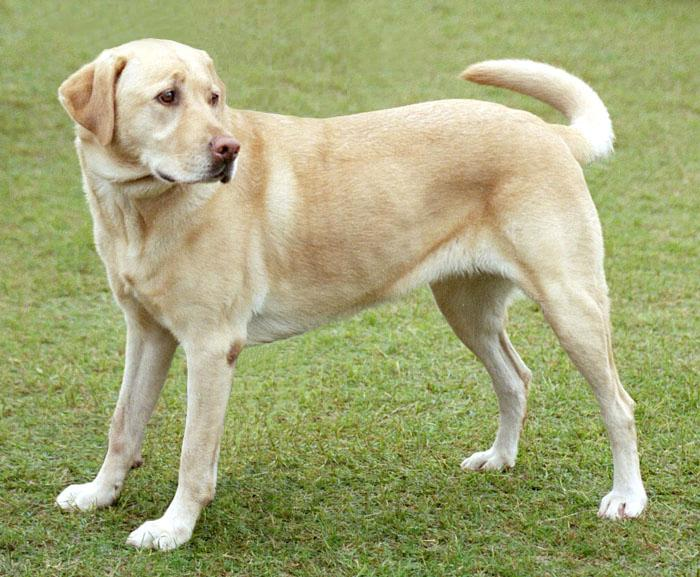

In [8]:
# Open image
image = Image.open("../assets/YellowLabradorLooking_new.jpg").convert("RGB")
display(image)

In [ ]:
# Choose a DINOv2 model: small (S), base (B), large (L), giant (G)
MODEL_NAME = "facebook/dinov2-small"

# Load processor + model
processor = AutoImageProcessor.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)

# Preprocess
inputs = processor(images=image, return_tensors="pt")

# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# CLS embedding (global image representation)
# CLS embedding shape: torch.Size([1, 384])
# The first is the CLS token embedding: 
# summary embedding for downstream tasks that require global understanding, 
# such as: classification, similarity, etc.
cls_embedding = outputs.last_hidden_state[:, 0]
print("CLS embedding shape:", cls_embedding.shape)

# Patch embeddings (local features)
# Patch embeddings shape: torch.Size([1, 256, 384])
# The rest are patch embeddings: 
# useful for tasks that capture localized information,
# that can be used for object detection, segmentation, depth, saliency, etc.
# Each local embedding corresponds to a patch in rasterized row-major order.
patch_embeddings = outputs.last_hidden_state[:, 1:]
print("Patch embeddings shape:", patch_embeddings.shape)

CLS embedding shape: torch.Size([1, 384])
Patch embeddings shape: torch.Size([1, 256, 384])
